# Introduction 

In this notebook we will first apply non-linear fit. But the higher and higher polynomial is prone to overfit. In order to avoide that we need to apply the suitable order polynomial. 

After that we will examine the regularization method. This is the method which automatically selects the more important interactions by penalizing the less important interactions, even if we apply the higher order polynomials.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('ex2data2.txt', header = None, names = ['Microchip_Test_1', 'Microchip_Test_2', 'Status'])
df.sample(5)

,Microchip_Test_1,Microchip_Test_2,Status
53,-0.20795,0.35599,1
63,0.60426,0.59722,0
30,-0.26555,0.96272,1
75,0.51786,-0.59430,0
55,-0.43836,0.21711,1


In [2]:
X = df.drop(['Status'], axis = 1)
y = df['Status']
m = len(y)

X.insert(0, 'Bias', 1)

theta = np.zeros(3)

# Need for polynomail fit 

Looking at the plot below, it is clear that the linear decision boundary is not going to work in this case. 

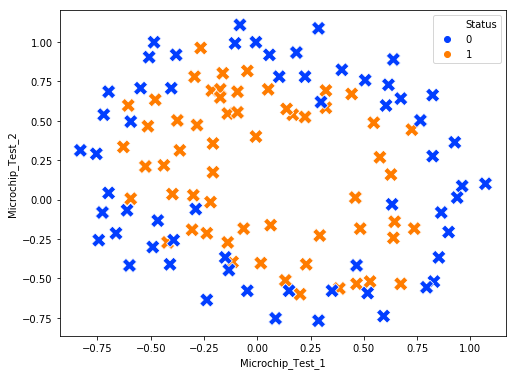

In [3]:
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
plt.show()

# Optimizing cost function 

This part of code is same as previous notebook. 

In [4]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

def hypothesis(theta, X):
    z = np.dot(X, theta)
    return sigmoid(z)

def cost_function(theta, X, y):
    
    first_term = np.dot(np.log(hypothesis(theta, X)), y)
    second_term = np.dot(np.log(1 - hypothesis(theta, X)), 1 - y)
    
    return - 1/m *  (first_term + second_term)

def gradient(theta, X, y):
    
    temp = hypothesis(theta, X) - y
    return 1/m * np.dot(temp, X)

In [5]:
print('Cost function : \t', cost_function(theta, X, y))
print('Initial gradient : \t', gradient(theta, X, y))

Cost function : 	 0.6931471805599454
Initial gradient : 	 [8.47457627e-03 1.87880932e-02 7.77711864e-05]


In [6]:
import scipy.optimize as opt

alpha = 0.01

min_at = opt.fmin_tnc(func = cost_function, x0 = theta, fprime = gradient, args = (X, y))[0]

print('(Theta_0, Theta_1, Theta_2) : \t\t', min_at)
print('The minimum value of cost function: \t', cost_function(min_at, X, y))

(Theta_0, Theta_1, Theta_2) : 		 [-0.01418037 -0.30356918 -0.01812412]
The minimum value of cost function: 	 0.6902411220928226


# Polynomial features 

So far we have not introduced the non-linear (also called polynomial or interaction). Here we will develope interaction terms 

In [7]:
def poly_features(X, degree):
    
    X_1 = pd.DataFrame()
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            X_1['power_' + str(i - j) + str(j)] = np.power(X.iloc[:, 1], i - j) * np.power(X.iloc[:, 2], j)
    
    X_1.insert(0, 'Bias', 1)
    return X_1

In [8]:
poly_features(X, 3).head()

,Bias,power_10,power_01,power_20,power_11,power_02,power_30,power_21,power_12,power_03
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960


# Optimization at different order of polynomial

In [9]:
def theta_min(X, degree):
    X1 = poly_features(X, degree)
    theta_i = np.zeros(np.shape(X1)[1])
    
    return opt.fmin_tnc(func = cost_function, x0 = theta_i, fprime = gradient, args = (X1, y))[0]
    

In [10]:
theta_min(X, 3)

array([  5.13922684,   2.70653872,   4.81764423, -12.38033106,
        -8.43199919, -11.55326765,   0.57713288,   0.8639865 ,
         2.7924486 ,  -1.33264757])

In [11]:
print('(Theta_0, Theta_1, Theta_2, ......, Theta_?) : \n\n', theta_min(X, 3)[:, np.newaxis])
print('\n The minimum value of cost function: \t', cost_function(theta_min(X, 3), poly_features(X, 3), y))

(Theta_0, Theta_1, Theta_2, ......, Theta_?) : 

 [[  5.13922684]
 [  2.70653872]
 [  4.81764423]
 [-12.38033106]
 [ -8.43199919]
 [-11.55326765]
 [  0.57713288]
 [  0.8639865 ]
 [  2.7924486 ]
 [ -1.33264757]]

 The minimum value of cost function: 	 0.34472770153731025


# Prediction by different order of polynomial 

Here we see that the higher order polynomial gives better and better accuracy. But we will notice that this is due to overfitting in the next section. 

In [12]:
def prediction(X, degree):
    th = theta_min(X, degree)
    pth = poly_features(X, degree)
    
    pred = hypothesis(th, pth) > 0.5
    
    return np.mean(y == pred)

In [13]:
for i in range(1, 9):
    print('For', i, 'th order polynomial the accuracy of the prediction is: \t', prediction(X, i))

For 1 th order polynomial the accuracy of the prediction is: 	 0.5508474576271186
For 2 th order polynomial the accuracy of the prediction is: 	 0.8559322033898306
For 3 th order polynomial the accuracy of the prediction is: 	 0.847457627118644
For 4 th order polynomial the accuracy of the prediction is: 	 0.847457627118644
For 5 th order polynomial the accuracy of the prediction is: 	 0.8898305084745762
For 6 th order polynomial the accuracy of the prediction is: 	 0.8728813559322034
For 7 th order polynomial the accuracy of the prediction is: 	 0.8898305084745762
For 8 th order polynomial the accuracy of the prediction is: 	 0.8898305084745762


# Making grids to find decision boundary 

Decision boundary is the locus of points where the value of hypothesis is 50%. We will search that location through grid.

In [14]:
X1_range = np.linspace(-1, 1.5)
X2_range = np.linspace(-1, 1.5)
X11_range, X22_range = np.meshgrid(X1_range, X2_range)

In [15]:
grid_list = [[0,0]]
for i in X1_range:
    for j in X2_range:
        grid_list.append([j, i])
        
grid_df = pd.DataFrame(grid_list).drop(0)
grid_df.insert(0, 'Bias', 1)

In [16]:
def grid_hypo(X, degree, data):
    
    theta_i = theta_min(X, degree)
    poly_i = poly_features(data, degree)
    
    return hypothesis(theta_i, poly_i)

In [17]:
grid_hypo(X, 3, grid_df)

array([4.44807821e-17, 3.67496254e-16, 2.80978395e-15, ...,
       1.52593748e-19, 3.02686404e-20, 5.74195267e-21])

# Decision boundary for different polynomial 

In [18]:
import seaborn as sns

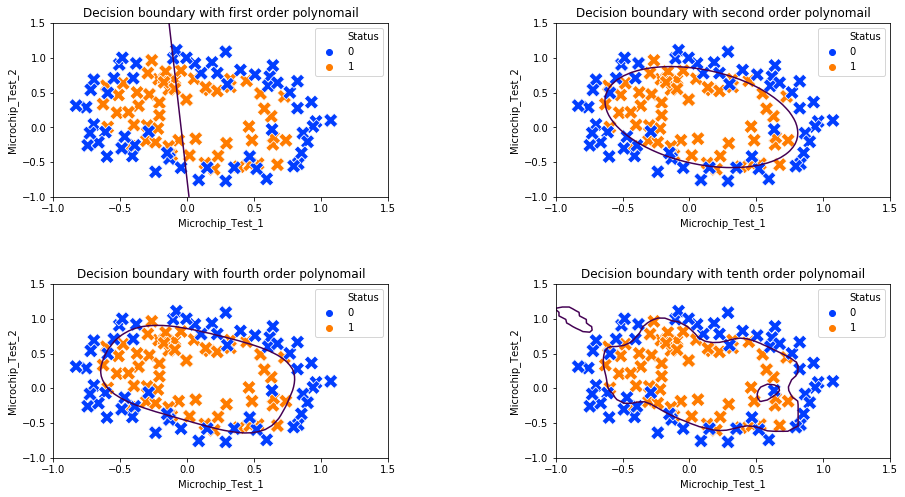

In [19]:
import warnings
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

fig = plt.figure(figsize= (15, 8))

ax = fig.add_subplot(221)
ax.contour(X1_range, X2_range, grid_hypo(X, 1, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with first order polynomail')

ax = fig.add_subplot(222)
ax.contour(X1_range, X2_range, grid_hypo(X, 2, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with second order polynomail')

ax = fig.add_subplot(223)
ax.contour(X1_range, X2_range, grid_hypo(X, 4, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with fourth order polynomail')

ax = fig.add_subplot(224)
ax.contour(X1_range, X2_range, grid_hypo(X, 10, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with tenth order polynomail')

fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.show()

First order polynomial is a straight line. It is doing worst job in classifying things. 
Second order polynomial give some conic section. It is ellipse in this case. It significantly improves the performance. 
Higher order polynomilas give complicated curve and may be prone to overfit, which is clearly evident in the tenth order polynomial.

# Changing the cut off 

Sometimes we want to change the decision boundary to different location that hypothesis = 50%. The reason being we want less error on classification of one class of objects compromizing the accuracy of other class. If this thing is needed we can easily customize the things accordingly. 

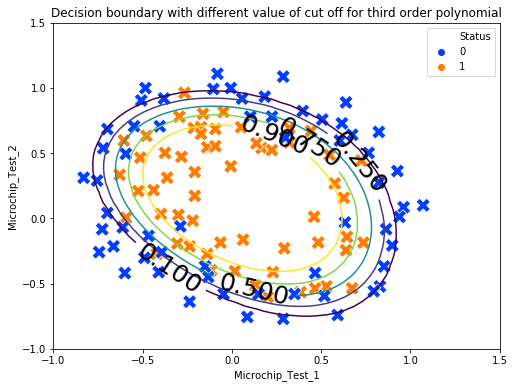

In [20]:
plt.figure(figsize= (8, 6))
cs = plt.contour(X1_range, X2_range, grid_hypo(X, 3, grid_df).reshape(50, 50), [0.1, 0.25, 0.5, 0.75, 0.9])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
plt.clabel(cs, inline = 10, fontsize = 25, colors = 'k')
plt.title('Decision boundary with different value of cut off for third order polynomial')
plt.show()

# Regularization 

The question is we are fitting polynomial features, then how can we know which polynomial to keep and which to reject? One way to try each possible combination of interaction. But this brute force method is lengthy. The good solution of the problem is to apply regularization. 

Here the cost function and gradient modified as follows: 

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(X^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(X^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
.
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (X^{(i)})-y^{(i)})X^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$

Where added term is last term containing $\lambda$

In [21]:
def cost_function_reg(theta, X, y, lmbd):
    
    first_term = np.dot(np.log(hypothesis(theta, X)), y)
    second_term = np.dot(np.log(1 - hypothesis(theta, X)), 1 - y)
    
    theta_p = np.delete(theta, 0)
    reg = lmbd/(2 * m) * np.dot(theta_p, theta_p)
    
    return - 1/m *  (first_term + second_term) + reg 

def gradient_reg(theta, X, y, lmbd):
    
    temp = hypothesis(theta, X) - y
    theta_p = np.delete(theta, 0)
    reg = lmbd/m * np.append(0, theta_p)
    
    return 1/m * np.dot(temp, X)

def theta_min_reg(X, degree, lmbd):
    X1 = poly_features(X, degree)
    theta_i = np.zeros(np.shape(X1)[1])
    
    return opt.fmin_tnc(func = cost_function_reg, x0 = theta_i, fprime = gradient_reg, args = (X1, y, lmbd))[0]

In [22]:
theta_min_reg(X, 3, 1)

array([ 1.22044847,  0.74122032,  1.28256414, -2.9661883 , -0.71205382,
       -2.07730806, -0.18533901, -0.38907244, -0.27848653, -1.01687827])

# Changing the regularization parameter

In [23]:
def prediction_reg(X, degree, lmbd):
    th = theta_min_reg(X, degree, lmbd)
    pth = poly_features(X, degree)
    
    pred = hypothesis(th, pth) > 0.5
    
    return np.mean(y == pred)

def grid_hypo_reg(X, degree, lmbd, data):
    
    theta_i = theta_min_reg(X, degree, lmbd)
    poly_i = poly_features(data, degree)
    
    return hypothesis(theta_i, poly_i)

In [24]:
print('Accuracy with lambda = 0   \t', prediction_reg(X, 8, 0))
print('Accuracy with lambda = 0.1  \t', prediction_reg(X, 8, 0.1))
print('Accuracy with lambda = 1  \t', prediction_reg(X, 8, 1))
print('Accuracy with lambda = 10  \t', prediction_reg(X, 8, 10))

Accuracy with lambda = 0   	 0.8898305084745762
Accuracy with lambda = 0.1  	 0.8389830508474576
Accuracy with lambda = 1  	 0.8305084745762712
Accuracy with lambda = 10  	 0.8305084745762712


Here we noticed that the accuracy is lower and lower with increasing regularization parameter. But in the plot below we see that lower $\lambda$ actually overfits the data.

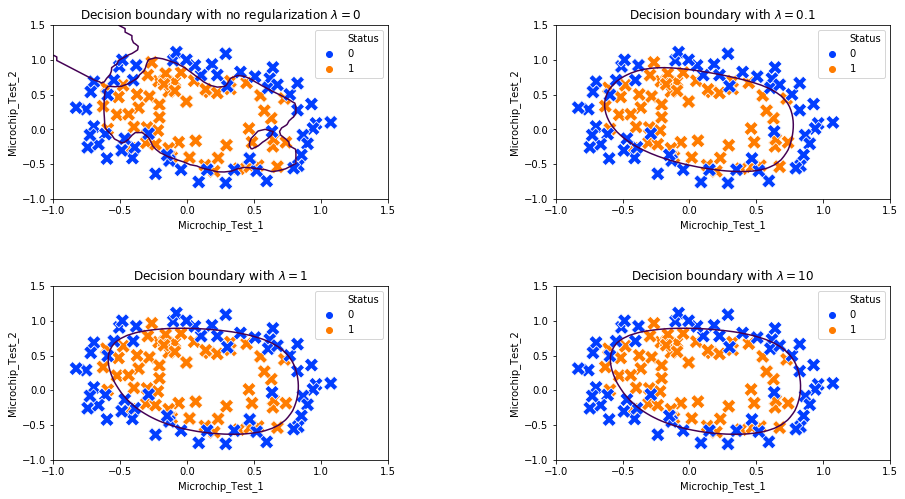

In [25]:
fig = plt.figure(figsize= (15, 8))

ax = fig.add_subplot(221)
ax.contour(X1_range, X2_range, grid_hypo_reg(X, 8, 0, grid_df).reshape(50, 50), [0.5])

sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with no regularization $\lambda = 0$')

ax = fig.add_subplot(222)
ax.contour(X1_range, X2_range, grid_hypo_reg(X, 8, 0.1, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with $\lambda = 0.1 $')

ax = fig.add_subplot(223)
ax.contour(X1_range, X2_range, grid_hypo_reg(X, 8, 1, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with $\lambda = 1 $')

ax = fig.add_subplot(224)
ax.contour(X1_range, X2_range, grid_hypo_reg(X, 8, 10, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with $ \lambda = 10 $')

fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.show()

# Scikit learn Polynomial 

Sklearn have many in built methods for the things we did above. Here is the example. 

C is the inverse of the $\lambda$. So large C corresponds to smaller regularization. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

model = LogisticRegression(solver= 'newton-cg', C = 100)
poly_reg = PolynomialFeatures(degree = 2)

X = df.drop(['Status'], axis = 1)
y = df['Status']

x_poly = poly_reg.fit_transform(X)
model.fit(x_poly, y)

print(model.intercept_, model.coef_)

[4.70351936] [[-7.47520268e-10  2.88291861e+00  3.73137027e+00 -1.09226545e+01
  -6.64471411e+00 -1.06703837e+01]]


In [27]:
from sklearn.metrics import accuracy_score, r2_score
y_pred = model.predict(x_poly)
print('R-squared value : \t', r2_score(y, y_pred))
print('Accuracy socre : \t', accuracy_score(y, y_pred))

print('Alternative way : \t', model.score(poly_reg.fit_transform(X), y))
print('Actual formula: \t', 1 - np.mean(np.abs(y - y_pred)))

R-squared value : 	 0.4235632183908046
Accuracy socre : 	 0.8559322033898306
Alternative way : 	 0.8559322033898306
Actual formula: 	 0.8559322033898304


# Sklearn regularization 

Alternatively we can use RidgeClassifier. BTW the type of regularization we are using is called the ridge regularization. The other famous one being Lasso.

In [28]:
from sklearn.linear_model import RidgeClassifier

model_reg = RidgeClassifier(alpha = 100)
model_reg.fit(x_poly, y)

y_pred_reg = model_reg.predict(x_poly)
print('R-squared value : \t', r2_score(y, y_pred_reg))
print('Accuracy socre : \t', accuracy_score(y, y_pred_reg))

R-squared value : 	 -0.15287356321839085
Accuracy socre : 	 0.711864406779661


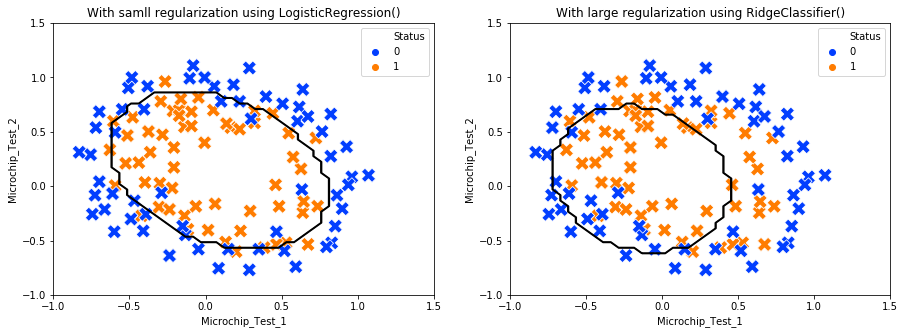

In [29]:
X_grid = grid_df.drop(['Bias'], axis = 1)
X_grid_poly = poly_reg.fit_transform(X_grid)

grid_pred = model.predict(X_grid_poly).reshape(50, 50)
grid_pred_reg = model_reg.predict(X_grid_poly).reshape(50, 50)


fig = plt.figure(figsize= (15, 5))

ax = fig.add_subplot(121)
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.contour(X1_range, X2_range, grid_pred, [0.45, 0.55], colors = 'k')
ax.set_title('With samll regularization using LogisticRegression()')


ax = fig.add_subplot(122)
sns.scatterplot(x ='Microchip_Test_1', y = 'Microchip_Test_2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.contour(X1_range, X2_range, grid_pred_reg, [0.45, 0.55], colors = 'k')
ax.set_title('With large regularization using RidgeClassifier()')
plt.show()

# Statsmodels 

Statsmodels also can be used to deal witht the interactions. Here is the code: 

In [30]:
import statsmodels.formula.api as smf

feature_string = ''' Status ~ Microchip_Test_1 + Microchip_Test_2
                            + I(Microchip_Test_1 ** 2) 
                                + I(Microchip_Test_2 ** 2) 
                                    + I(Microchip_Test_1 ** Microchip_Test_2)'''

results = smf.logit(feature_string , data = df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.349240
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                   58
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Nov 2018   Pseudo R-squ.:                  0.4922
Time:                        14:40:59   Log-Likelihood:                -20.256
converged:                       True   LL-Null:                       -39.892
                                        LLR p-value:                 2.094e-07
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   5.5291      2.539      2.177      0.029       0.552      10.506
Microchip_Test_1                            4.9649      6.885      0.721      0.471      -8.530      18.459
Microchip_Test_2                            0.4249      1.214      0.350      0.726      -1.954       2.804
I(Microchip_Test_1 ** 2)                  -14.2786      7.297     -1.957      0.050     -28.581       0.024
I(Microchip_Test_2 ** 2)                  -11.5852      3.382     -3.425      0.001     -18.214      -4.956
I(Microchip_Test_1 ** Microchip_Test_2)    -0.4118      0.667     -0.618      0.537      -1.718       0.895
===========================================================================================================
"""